In [137]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
from matplotlib import style
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.utils import shuffle
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc
from pandas.plotting import scatter_matrix
from sklearn.metrics import confusion_matrix


In [2]:
data = pd.read_csv("/content/student-mat.csv",sep=";")

In [3]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [4]:
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [39]:
data.paid.unique()

array(['no', 'yes'], dtype=object)

We found the following columns are in categorical format.

In [6]:
categorical_columns = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian',
                       'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']
encoded_df = pd.get_dummies(data, columns=categorical_columns, drop_first=True)
categorical_data = data[categorical_columns]
print(categorical_data.head())

  school sex address famsize Pstatus     Mjob      Fjob  reason guardian  \
0     GP   F       U     GT3       A  at_home   teacher  course   mother   
1     GP   F       U     GT3       T  at_home     other  course   father   
2     GP   F       U     LE3       T  at_home     other   other   mother   
3     GP   F       U     GT3       T   health  services    home   mother   
4     GP   F       U     GT3       T    other     other    home   father   

  schoolsup famsup paid activities nursery higher internet romantic  
0       yes     no   no         no     yes    yes       no       no  
1        no    yes   no         no      no    yes      yes       no  
2       yes     no  yes         no     yes    yes      yes       no  
3        no    yes  yes        yes     yes    yes      yes      yes  
4        no    yes  yes         no     yes    yes       no       no  


In [42]:
for i in categorical_columns:
  print(i, data[i].unique())

school ['GP' 'MS']
sex ['F' 'M']
address ['U' 'R']
famsize ['GT3' 'LE3']
Pstatus ['A' 'T']
Mjob ['at_home' 'health' 'other' 'services' 'teacher']
Fjob ['teacher' 'other' 'services' 'health' 'at_home']
reason ['course' 'other' 'home' 'reputation']
guardian ['mother' 'father' 'other']
schoolsup ['yes' 'no']
famsup ['no' 'yes']
paid ['no' 'yes']
activities ['no' 'yes']
nursery ['yes' 'no']
higher ['yes' 'no']
internet ['no' 'yes']
romantic ['no' 'yes']


to do:


drop....schoolsup, famsup, paid, activities, romantic,Fjob,guardian

change mJob....at_home or job

In [7]:
X = encoded_df.drop(['G3'], axis=1)
Y = encoded_df['G3']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=41)
print("Training set shapes:")
print("x_train:", x_train.shape)
print("y_train:", y_train.shape)
print("\nTesting set shapes:")
print("x_test:", x_test.shape)
print("y_test:", y_test.shape)

Training set shapes:
x_train: (355, 41)
y_train: (355,)

Testing set shapes:
x_test: (40, 41)
y_test: (40,)


In [8]:
best = 0
for _ in range(10):
    x_train, x_test, y_train, y_test=train_test_split(X,Y,test_size=0.1)
    linear=linear_model.LinearRegression()
    linear.fit(x_train,y_train)
   # accuracy=linear.score(x_test,y_test)
    accuracy = cross_val_score(linear, X, Y, cv=5).mean()
    if accuracy>best:
        with open("Studentmodel1.pickle","wb") as f:
            pickle.dump(linear,f)
pickle_in = open("Studentmodel1.pickle", "rb")
linear = pickle.load(pickle_in)
best_accuracy = linear.score(x_test, y_test)
print("Accuracy Befor Feature Selection:", best_accuracy)
#linear_cv_accuracy = cross_val_score(linear, X, Y, cv=5).mean()
#print("Linear linear Cross-Validation Accuracy:", linear_cv_accuracy)

Accuracy Befor Feature Selection: 0.9061058324586233


Now we will do feature selection.

In [ ]:
print("Co-efficient: \n", linear.coef_)
print("Intercept: \n", linear.intercept_)
prediction= linear.predict(x_test)
print("Actual Value\t\tPredicted Value")
for x in range(len(prediction)):
    print("{}\t\t{:.5f}".format(y_test.values[x], prediction[x]))

Co-efficient: 
 [-0.21951528  0.1373002  -0.15214292  0.00976419 -0.05165884 -0.18499345
  0.39719976  0.05039616 -0.03534255 -0.1250516   0.20949516  0.08639063
  0.03854939  0.15885339  0.96740832  0.61550515  0.14895249  0.31474785
 -0.13448249 -0.19603978 -0.1688148   0.16050418 -0.04956625 -0.07884863
  0.43181903  0.11823259 -0.118187    0.34757631 -0.27470386  0.235987
  0.25966836  0.30889496  0.17148524  0.25039028  0.19917588 -0.00296301
 -0.34703577 -0.11769035 -0.45730259 -0.24532249 -0.19325977]
Intercept: 
 0.026009826669540104
Actual Value		Predicted Value
14		12.71490
18		18.48523
15		15.25218
8		4.71146
14		12.04674
11		9.17495
12		12.48587
15		13.91338
19		18.30006
11		10.50612
15		15.37733
13		12.34320
10		10.07261
13		13.29022
7		7.64238
10		7.63650
18		18.83687
0		3.74377
10		10.00601
10		9.97627
15		15.53030
8		7.91653
0		6.99429
0		5.48056
15		15.82522
9		9.12996
0		6.79868
13		13.64358
11		7.72403
10		9.43513
11		9.16352
15		13.58442
10		9.66669
10		8.09870
6		4

In [ ]:
best_accuracy_after_fs = 0
selected_feature_indices = None
for _ in range(10):
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.1)
    rfe = RFE(LinearRegression(), n_features_to_select=41)
    rfe.fit(x_train, y_train)
    selected_features = rfe.get_support()
    selected_feature_indices = [i for i, val in enumerate(selected_features) if val]
    linear.fit(x_train.loc[:, selected_features], y_train)
    #accuracy_after_fs = linear.score(x_test.loc[:, selected_features], y_test)
    accuracy_after_fs = cross_val_score(linear, X, Y, cv=5).mean()
    if accuracy_after_fs > best_accuracy_after_fs:
        best_accuracy_after_fs = accuracy_after_fs
        with open("Studentmodel2.pickle", "wb") as f:
            pickle.dump(linear, f)
pickle_in_fs = open("Studentmodel2.pickle", "rb")
linear_fs = pickle.load(pickle_in_fs)
best_accuracy_after_fs=linear_fs.score(x_test,y_test)
print("Best Accuracy After Feature Selection:", best_accuracy_after_fs)

Best Accuracy After Feature Selection: 0.9038601987870715


# **Ridge regression**

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import accuracy_score


In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import accuracy_score

ridge_model = Ridge()
ridge_model.fit(x_train, y_train)

predict = ridge_model.predict(x_test)

accuracyRidgeModel = cross_val_score(ridge_model,X,Y).mean()

print("Accuracy achieved using ridge_model : " , accuracyRidgeModel)

Accuracy achieved using ridge_model :  0.78610766694578


#**Lasso** **Regression**

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
from sklearn.linear_model import Lasso

lasso_model = linear_model.Lasso(alpha=0.1)
lasso_model.fit(x_train, y_train)

predict = lasso_model.predict(x_test)

accuracyRidgeModel = cross_val_score(lasso_model,X,Y).mean()

print("Accuracy achieved using ridge_model : " , accuracyRidgeModel)

Accuracy achieved using ridge_model :  0.8135312691232344


#**Bayesian** **Linear** **Regression**

In [ ]:
from sklearn import linear_model

In [ ]:
from sklearn import linear_model

bayesianLinearRegression_model = linear_model.BayesianRidge()
bayesianLinearRegression_model.fit(x_train, y_train)

predict = bayesianLinearRegression_model.predict(x_test)

accuracyRidgeModel = cross_val_score(bayesianLinearRegression_model,X,Y).mean()

print("Accuracy achieved using ridge_model : " , accuracyRidgeModel)


Accuracy achieved using ridge_model :  0.8065637335747745


#**Principal Components Regression**

In [ ]:
from sklearn import

In [11]:
x_train.shape

(355, 41)

In [12]:
x_train.columns

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
       'school_MS', 'sex_M', 'address_U', 'famsize_LE3', 'Pstatus_T',
       'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher',
       'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher',
       'reason_home', 'reason_other', 'reason_reputation', 'guardian_mother',
       'guardian_other', 'schoolsup_yes', 'famsup_yes', 'paid_yes',
       'activities_yes', 'nursery_yes', 'higher_yes', 'internet_yes',
       'romantic_yes'],
      dtype='object')

In [16]:
x_train_withoutGrades = x_train.drop(columns=['G1','G2'] ,axis = 1)

In [17]:
x_train_withoutGrades.shape

(355, 39)

In [28]:
from sklearn.linear_model import Lasso

lasso_model = linear_model.Lasso(alpha=0.1)
lasso_model.fit(x_train_withoutGrades, y_train)

predict = lasso_model.predict(x_test_withoutGrades)

print(predict)
print(y_test)
#accuracyRidgeModel = cross_val_score(lasso_model,X,Y).mean()

#print("Accuracy achieved using ridge_model : " , accuracyRidgeModel)

[10.9483433  10.21176378 10.71474106 10.81038071 11.06959552 10.63403199
 11.93515773 12.21487891 12.0629191  11.7391791  11.357835   10.96067955
  8.56599342  8.81915623  7.81028204  7.64087158 12.97943591 13.01174
 10.4869066  12.30080652  9.50819044 12.74087349 11.15214359 10.76326557
 11.09629102 12.07042175 10.84977269  8.62117396 10.1472533  12.05940315
 11.37550227 10.92454284  9.68989742  8.36500172 10.85473768 11.40932255
 10.10516278 10.98310788 11.80826996 11.53800871]
26     11
122    13
158    15
215    15
197    10
136     0
107    18
393    10
87     14
135     0
291    15
379    10
252     8
352     8
161     7
255     8
31     17
89      7
154    12
100     5
248     5
66     12
96     15
39     13
323    15
289    15
246    13
61     11
204    11
116    14
293    18
303    18
218     8
130     0
109    16
45      6
258    14
106     8
178     9
190    13
Name: G3, dtype: int64


In [19]:
x_test.shape

(40, 41)

In [20]:
x_test_withoutGrades = x_test.drop(columns=['G1','G2'] ,axis = 1)

In [22]:
X_withoutGrades = X.drop(columns=['G1','G2'],axis = 1)

In [29]:
X_withoutGrades.columns

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'school_MS',
       'sex_M', 'address_U', 'famsize_LE3', 'Pstatus_T', 'Mjob_health',
       'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_health',
       'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_home',
       'reason_other', 'reason_reputation', 'guardian_mother',
       'guardian_other', 'schoolsup_yes', 'famsup_yes', 'paid_yes',
       'activities_yes', 'nursery_yes', 'higher_yes', 'internet_yes',
       'romantic_yes'],
      dtype='object')

In [30]:
X.columns

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
       'school_MS', 'sex_M', 'address_U', 'famsize_LE3', 'Pstatus_T',
       'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher',
       'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher',
       'reason_home', 'reason_other', 'reason_reputation', 'guardian_mother',
       'guardian_other', 'schoolsup_yes', 'famsup_yes', 'paid_yes',
       'activities_yes', 'nursery_yes', 'higher_yes', 'internet_yes',
       'romantic_yes'],
      dtype='object')

In [45]:
exclude_value = "at_home"

# Change all values in the column except for the exclude_value
new_value = 10

# Change the values
data.loc[data['Mjob'] != exclude_value, 'Mjob'] = 'other'

print(data.Mjob.unique())

['at_home' 'other']


In [49]:
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

to do:

drop....schoolsup, famsup, paid, activities, romantic,Fjob,guardian

In [66]:
data = data.drop(columns=['schoolsup', 'famsup', 'paid', 'activities', 'romantic', 'Fjob', 'guardian', 'Pstatus','reason'], axis=1)

KeyError: "['schoolsup', 'famsup', 'paid', 'activities', 'romantic', 'Fjob', 'guardian', 'Pstatus', 'reason'] not found in axis"

In [67]:
categorical_columns = ['school', 'sex', 'address', 'famsize', 'Mjob',
                       'nursery', 'higher', 'internet', ]
encoded_df = pd.get_dummies(data, columns=categorical_columns, drop_first=True)
categorical_data = data[categorical_columns]
print(categorical_data.head())

  school sex address famsize     Mjob nursery higher internet
0     GP   F       U     GT3  at_home     yes    yes       no
1     GP   F       U     GT3  at_home      no    yes      yes
2     GP   F       U     LE3  at_home     yes    yes      yes
3     GP   F       U     GT3    other     yes    yes      yes
4     GP   F       U     GT3    other     yes    yes       no


In [68]:
encoded_df.columns

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
       'G3', 'school_MS', 'sex_M', 'address_U', 'famsize_LE3', 'Mjob_other',
       'nursery_yes', 'higher_yes', 'internet_yes'],
      dtype='object')

In [69]:
encoded_df.shape

(395, 24)

## **New freshhhhhhh**

In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
from matplotlib import style
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.utils import shuffle
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc
from pandas.plotting import scatter_matrix
from sklearn.metrics import confusion_matrix

In [2]:
data = pd.read_csv("/content/student-mat.csv",sep=";")

In [3]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [4]:
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [5]:
print("Number of columns in data before any processing: ",data.shape[1])
print("Number of entries in data before any processing: ",data.shape[0])

Number of columns in data before any processing:  33
Number of entries in data before any processing:  395



**Data cleaning**


Now we will remove features that are unneccesary.

In [6]:
data = data.drop(columns=['schoolsup', 'famsup', 'paid', 'activities', 'romantic', 'Fjob', 'guardian', 'Pstatus','reason'], axis=1)

In [7]:
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Medu', 'Fedu', 'Mjob',
       'traveltime', 'studytime', 'failures', 'nursery', 'higher', 'internet',
       'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences',
       'G1', 'G2', 'G3'],
      dtype='object')

In [8]:
exclude_value = "at_home"

new_value = 10
data.loc[data['Mjob'] != exclude_value, 'Mjob'] = 'other'

print(data.Mjob.unique())

['at_home' 'other']


After going through the dataset we are able to distinguish the categorical behaviour.

In [9]:
categorical_columns = ['school', 'sex', 'address', 'famsize', 'Mjob',
                       'nursery', 'higher', 'internet', ]
encoded_df = pd.get_dummies(data, columns=categorical_columns, drop_first=True)
categorical_data = data[categorical_columns]
print(categorical_data.head())

  school sex address famsize     Mjob nursery higher internet
0     GP   F       U     GT3  at_home     yes    yes       no
1     GP   F       U     GT3  at_home      no    yes      yes
2     GP   F       U     LE3  at_home     yes    yes      yes
3     GP   F       U     GT3    other     yes    yes      yes
4     GP   F       U     GT3    other     yes    yes       no


In [10]:
encoded_df.columns

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
       'G3', 'school_MS', 'sex_M', 'address_U', 'famsize_LE3', 'Mjob_other',
       'nursery_yes', 'higher_yes', 'internet_yes'],
      dtype='object')

In [11]:
for col in categorical_columns:
  print(col, data[col].unique())

school ['GP' 'MS']
sex ['F' 'M']
address ['U' 'R']
famsize ['GT3' 'LE3']
Mjob ['at_home' 'other']
nursery ['yes' 'no']
higher ['yes' 'no']
internet ['no' 'yes']


In [12]:
X = encoded_df.drop(['G3'], axis=1)
Y = encoded_df['G3']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=41)
print("Training set shapes:")
print("x_train:", x_train.shape)
print("y_train:", y_train.shape)
print("\nTesting set shapes:")
print("x_test:", x_test.shape)
print("y_test:", y_test.shape)

Training set shapes:
x_train: (355, 23)
y_train: (355,)

Testing set shapes:
x_test: (40, 23)
y_test: (40,)


In [13]:
best = 0
for _ in range(10):
    x_train, x_test, y_train, y_test=train_test_split(X,Y,test_size=0.1)
    linear=linear_model.LinearRegression()
    linear.fit(x_train,y_train)
    accuracy = cross_val_score(linear, X, Y, cv=5).mean()
    if accuracy>best:
        with open("Studentmodel1.pickle","wb") as f:
            pickle.dump(linear,f)
pickle_in = open("Studentmodel1.pickle", "rb")
linear = pickle.load(pickle_in)
best_accuracy = linear.score(x_test, y_test)
print("Accuracy Befor Feature Selection:", best_accuracy)

Accuracy Befor Feature Selection: 0.8444150845637826


Ridge


In [14]:
from sklearn.linear_model import Ridge
from sklearn.metrics import accuracy_score

best_ridge_model = None
best_ridge_accuracy = 0

for _ in range(10):
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=42)
    ridge_model = Ridge()
    ridge_model.fit(x_train, y_train)
    ridge_accuracy = cross_val_score(ridge_model, X, Y).mean()
    if ridge_accuracy > best_ridge_accuracy:
        best_ridge_accuracy = ridge_accuracy
        best_ridge_model = ridge_model
with open("Ridge_model.pickle", "wb") as f:
    pickle.dump(best_ridge_model, f)
pickle_in_ridge = open("Ridge_model.pickle", "rb")
linear_ridge = pickle.load(pickle_in_ridge)
best_ridge_accuracy=linear_ridge.score(x_test,y_test)
print("Best Accuracy After Random Forest:", best_ridge_accuracy)

Best Accuracy After Random Forest: 0.7491145059057259


Lasso Regression

In [15]:
from sklearn.linear_model import Lasso

best_lasso_model = None
best_lasso_accuracy = 0

for _ in range(10):
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=42)
    lasso_model = linear_model.Lasso(alpha=0.1)
    lasso_model.fit(x_train, y_train)
    lasso_accuracy = cross_val_score(lasso_model, X, Y, cv=6).mean()
    if lasso_accuracy > best_lasso_accuracy:
        best_lasso_accuracy = lasso_accuracy
        best_lasso_model = lasso_model
with open("Lasso_model.pickle", "wb") as f:
    pickle.dump(best_lasso_model, f)
pickle_in_lasso = open("Lasso_model.pickle", "rb")
linear_lasso = pickle.load(pickle_in_lasso)
best_lasso_accuracy=linear_lasso.score(x_test,y_test)
print("Best Accuracy After Random Forest:", best_lasso_accuracy)

Best Accuracy After Random Forest: 0.7609449401402344


Random Forest

In [16]:
best_rf_model = None
best_rf_accuracy = 0

for _ in range(10):
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=42)
    rf_model = RandomForestRegressor(n_estimators=100, random_state=30)
    rf_model.fit(x_train, y_train)
    rf_accuracy = cross_val_score(rf_model, X, Y, cv=6).mean()
    if rf_accuracy > best_rf_accuracy:
        best_rf_accuracy = rf_accuracy
        best_rf_model = rf_model
with open("Random_Forest.pickle", "wb") as f:
    pickle.dump(best_rf_model, f)
pickle_in_rf = open("Random_Forest.pickle", "rb")
linear_rf = pickle.load(pickle_in_rf)
best_rf_accuracy=linear_rf.score(x_test,y_test)
print("Best Accuracy After Random Forest:", best_rf_accuracy)

Best Accuracy After Random Forest: 0.7720005061881502


Bayesian Linear Regression

In [18]:
best_blr_model = None
best_blr_accuracy = 0

for _ in range(10):
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=42)
    blr_model = linear_model.BayesianRidge()
    blr_model.fit(x_train, y_train)
    blr_accuracy = cross_val_score(blr_model, X, Y, cv=6).mean()
    if blr_accuracy > best_blr_accuracy:
        best_blr_accuracy = blr_accuracy
        best_blr_model = blr_model
with open("BayesianLinearRegression_model.pickle", "wb") as f:
    pickle.dump(best_blr_model, f)
pickle_in_blr = open("BayesianLinearRegression_model.pickle", "rb")
linear_blr = pickle.load(pickle_in_blr)
best_blr_accuracy=linear_blr.score(x_test,y_test)
print("Best Accuracy After Random Forest:", best_blr_accuracy)

Best Accuracy After Random Forest: 0.7551548540003403


# **Elastic net**

In [20]:
from sklearn.linear_model import ElasticNet

best_eNet_model = None
best_eNet_accuracy = 0

for _ in range(10):
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=42)
    eNet_model = ElasticNet(alpha=0.1, l1_ratio=0.5)
    eNet_model.fit(x_train, y_train)
    eNet_accuracy = cross_val_score(eNet_model, X, Y, cv=6).mean()
    if eNet_accuracy > best_eNet_accuracy:
        best_eNet_accuracy = eNet_accuracy
        best_eNet_model = eNet_model
with open("eNet.pickle", "wb") as f:
    pickle.dump(best_eNet_model, f)
pickle_in_eNet = open("eNet.pickle", "rb")
linear_eNet = pickle.load(pickle_in_eNet)
best_eNet_accuracy=linear_eNet.score(x_test,y_test)
print("Best Accuracy After Random Forest:", best_eNet_accuracy)

Best Accuracy After Random Forest: 0.7591609138082815


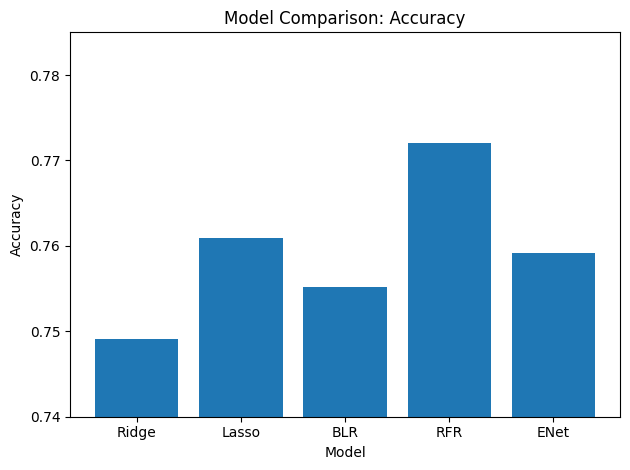

In [27]:
model_names = ['Ridge', 'Lasso', 'BLR', 'RFR', 'ENet']
accuracies = [best_ridge_accuracy, best_lasso_accuracy, best_blr_accuracy, best_rf_accuracy, best_eNet_accuracy]

plt.bar(model_names, accuracies)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Comparison: Accuracy')
plt.ylim(0.74, 0.785)  # Set the y-axis limit
plt.tight_layout()
plt.show()

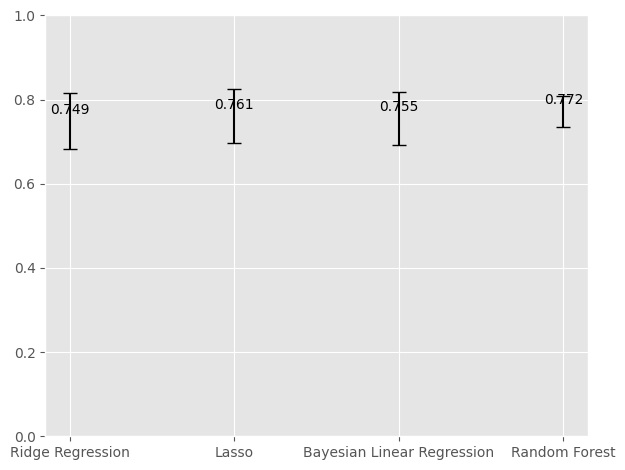

In [157]:
errors = [np.std(cross_val_score(model, X, Y, cv=5)) for model in [linear_ridge, linear_lasso, linear_blr, linear_rf]]
plt.errorbar(model_names, accuracies, yerr=errors, fmt='none', color='black', capsize=5)

# Annotate with accuracy values
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.01, f'{acc:.3f}', ha='center', va='bottom')

plt.ylim(0, 1)  # Set the y-axis limit
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.tight_layout()

plt.show()

Random Forest Precision: 0.48125
Random Forest Recall: 0.325
Random Forest F1 Score: 0.3192857142857143
Lasso Precision: 0.5
Lasso Recall: 0.325
Lasso F1 Score: 0.3350000000000001
BLRPrecision: 0.5854166666666666
BLR Recall: 0.325
BLR F1 Score: 0.31702020202020204
Random Forest Precision: 0.6583333333333333
Random Forest Recall: 0.5
Random Forest F1 Score: 0.4923809523809524
Random Forest Precision: 0.4854166666666667
Random Forest Recall: 0.3
Random Forest F1 Score: 0.3144444444444444


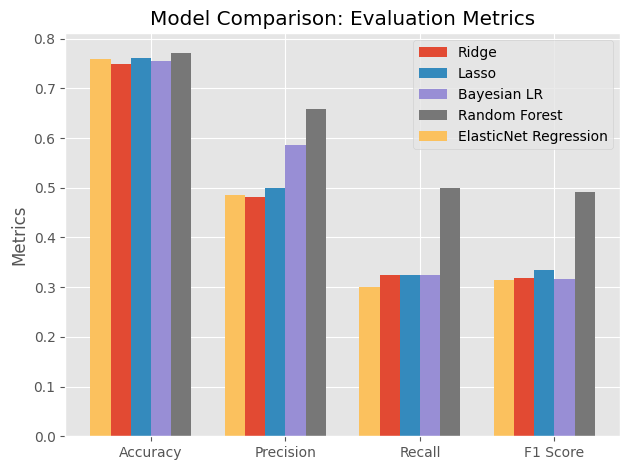

In [69]:
precision_ridge = precision_score(y_test, linear_ridge.predict(x_test).round(), average='weighted', zero_division=1)
recall_ridge = recall_score(y_test, linear_ridge.predict(x_test).round(), average='weighted', zero_division=1)
f1_ridge = f1_score(y_test, linear_ridge.predict(x_test).round(), average='weighted', zero_division=1)
print("Random Forest Precision:", precision_ridge)
print("Random Forest Recall:", recall_ridge)
print("Random Forest F1 Score:", f1_ridge)

precision_lasso = precision_score(y_test, linear_lasso.predict(x_test).round(), average='weighted', zero_division=1)
recall_lasso = recall_score(y_test, linear_lasso.predict(x_test).round(), average='weighted', zero_division=1)
f1_lasso = f1_score(y_test, linear_lasso.predict(x_test).round(), average='weighted', zero_division=1)
print("Lasso Precision:", precision_lasso)
print("Lasso Recall:", recall_lasso)
print("Lasso F1 Score:", f1_lasso)

precision_blr = precision_score(y_test, linear_blr.predict(x_test).round(), average='weighted', zero_division=1)
recall_blr = recall_score(y_test, linear_blr.predict(x_test).round(), average='weighted', zero_division=1)
f1_blr = f1_score(y_test, linear_blr.predict(x_test).round(), average='weighted', zero_division=1)
print("BLRPrecision:", precision_blr)
print("BLR Recall:", recall_blr)
print("BLR F1 Score:", f1_blr)

precision_rf = precision_score(y_test, linear_rf.predict(x_test).round(), average='weighted', zero_division=1)
recall_rf = recall_score(y_test, linear_rf.predict(x_test).round(), average='weighted', zero_division=1)
f1_rf = f1_score(y_test, linear_rf.predict(x_test).round(), average='weighted', zero_division=1)
print("Random Forest Precision:", precision_rf)
print("Random Forest Recall:", recall_rf)
print("Random Forest F1 Score:", f1_rf)

precision_eNet = precision_score(y_test, linear_eNet.predict(x_test).round(), average='weighted', zero_division=1)
recall_eNet = recall_score(y_test, linear_eNet.predict(x_test).round(), average='weighted', zero_division=1)
f1_eNet = f1_score(y_test, linear_eNet.predict(x_test).round(), average='weighted', zero_division=1)
print("Random Forest Precision:", precision_eNet)
print("Random Forest Recall:", recall_eNet)
print("Random Forest F1 Score:", f1_eNet)



metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
ridge_metrics = [best_ridge_accuracy, precision_ridge, recall_ridge, f1_ridge]
lasso_metrics = [best_lasso_accuracy, precision_lasso, recall_lasso, f1_lasso]
blr_metrics = [best_blr_accuracy, precision_blr, recall_blr, f1_blr]
rf_metrics = [best_rf_accuracy, precision_rf, recall_rf, f1_rf]
eNet_metrics = [best_eNet_accuracy, precision_eNet, recall_eNet, f1_eNet]


x = np.arange(len(metrics))
width = 0.15

fig, ax = plt.subplots()
rects1 = ax.bar(x - width * 1.5, ridge_metrics, width, label='Ridge')
rects2 = ax.bar(x - width * 0.5, lasso_metrics, width, label='Lasso')
rects3 = ax.bar(x + width * 0.5, blr_metrics, width, label='Bayesian LR')
rects4 = ax.bar(x + width * 1.5, rf_metrics, width, label='Random Forest')
rects5 = ax.bar(x - width * 2.5, eNet_metrics, width, label='ElasticNet Regression')

ax.set_ylabel('Metrics')
ax.set_title('Model Comparison: Evaluation Metrics')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

fig.tight_layout()
plt.show()

Manually selected Features and Linear regression:  0.7907114636665061
Co-efficient: 
 [ 0.15274614  0.97413078 -0.14431438 -0.32969251  0.04038578]
Intercept: 
 -1.5172265058908962


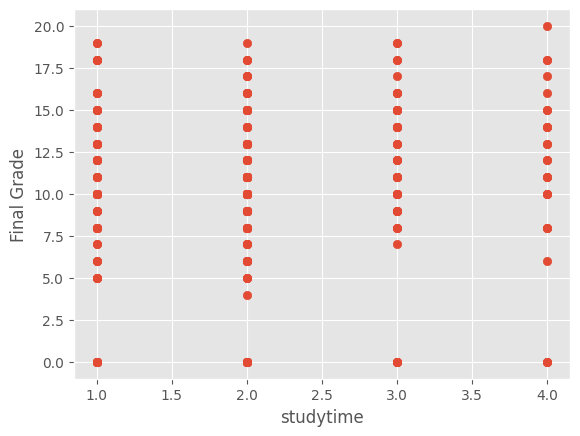

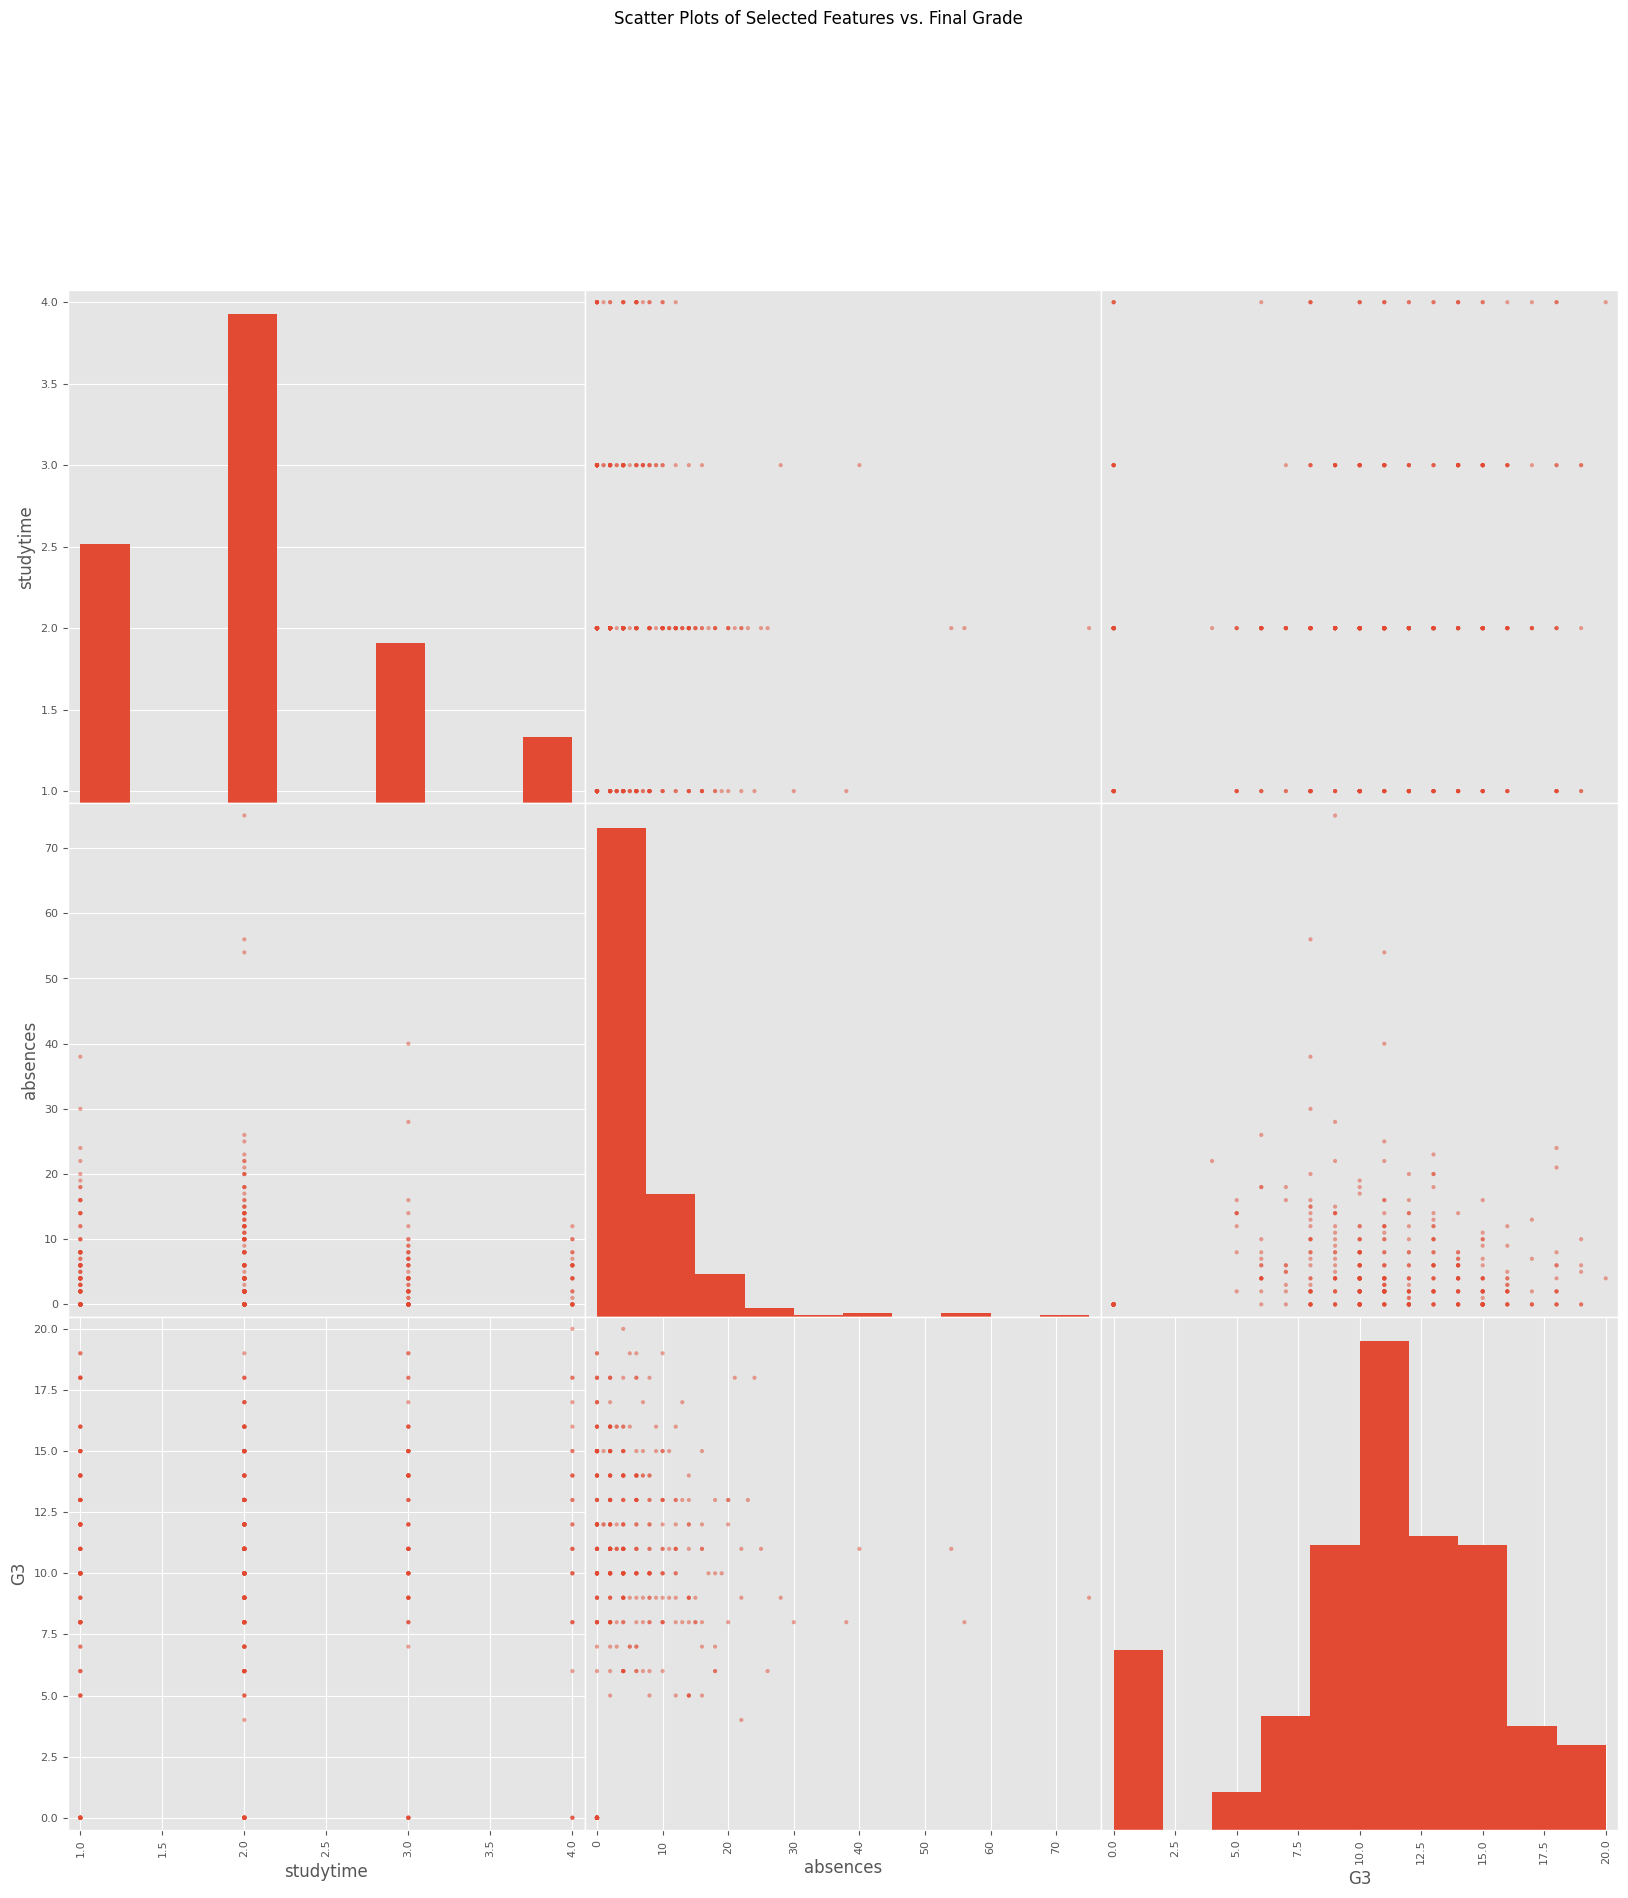

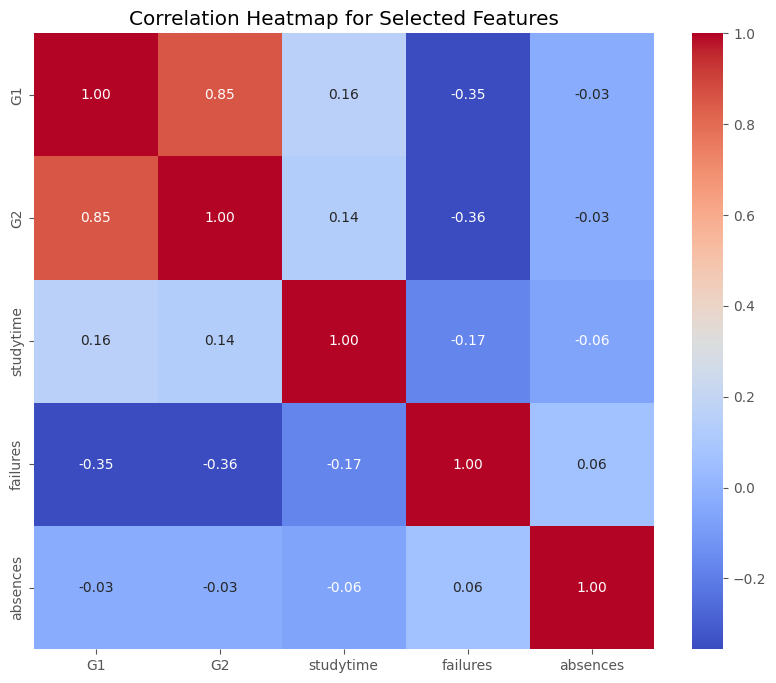

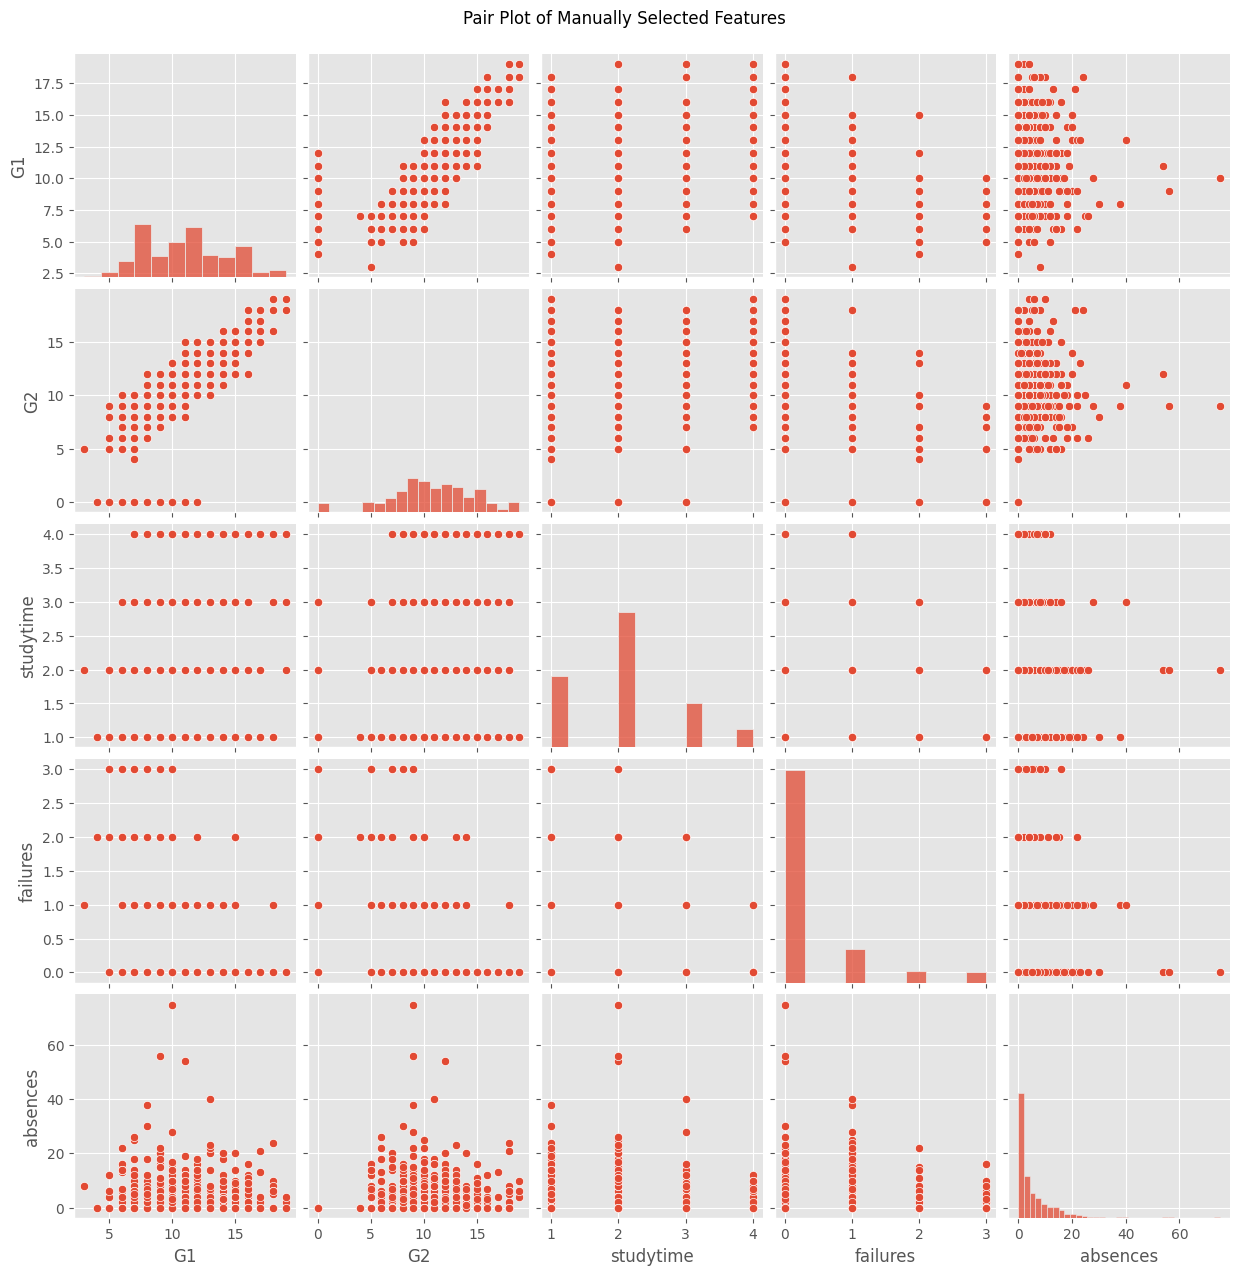

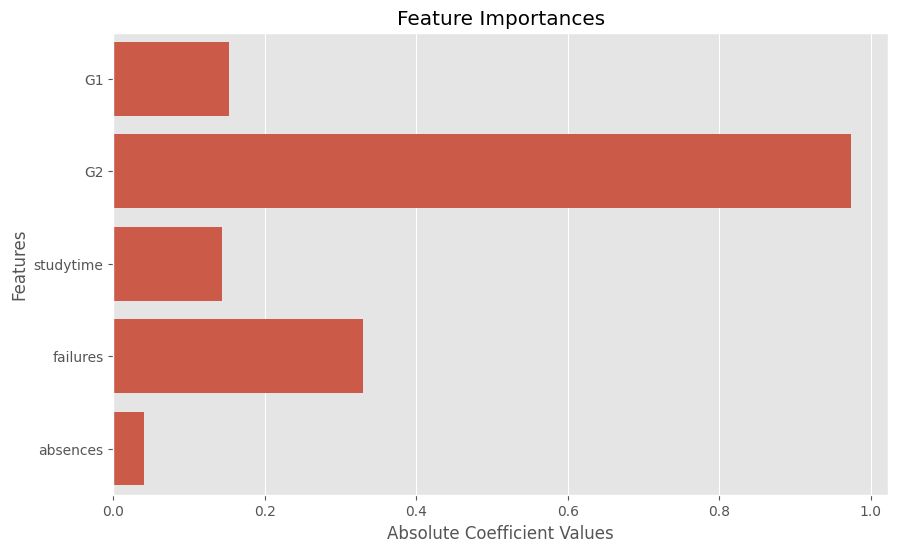

In [51]:
data = pd.read_csv('student-mat.csv', sep=";")
data=data[["G1","G2","G3","studytime","failures","absences"]]
pre="G3"
P= np.array(data.drop([pre], axis=1))
Q=np.array(data[pre])
p_train, p_test, q_train, q_test=train_test_split(P,Q,test_size=0.1)
regression=linear_model.LinearRegression()
regression.fit(p_train,q_train)
accuracyRegression=regression.score(p_test,q_test)
print("Manually selected Features and Linear regression: ",accuracyRegression)
print("Co-efficient: \n", regression.coef_)
print("Intercept: \n", regression.intercept_)
r='studytime'
style.use("ggplot")
plt.scatter(data[r],data["G3"])
plt.xlabel(r)
plt.ylabel("Final Grade")
plt.show()
selected_features = ['studytime', 'absences']
scatter_matrix(data[selected_features + [pre]], figsize=(20, 20), diagonal='hist')
plt.suptitle("Scatter Plots of Selected Features vs. Final Grade", y=1.02)
plt.show()
selected_features = ["G1", "G2", "studytime", "failures", "absences"]
selected_features_subset = data[selected_features]
correlation_matrix_subset = selected_features_subset.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_subset, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap for Selected Features")
plt.show()

selected_features = ["G1", "G2", "studytime", "failures", "absences"]
sns.pairplot(data[selected_features])
plt.suptitle("Pair Plot of Manually Selected Features", y=1.02)
plt.show()
feature_importances = np.abs(regression.coef_)  # Exclude the target variable
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=selected_features)
plt.title("Feature Importances")
plt.xlabel("Absolute Coefficient Values")
plt.ylabel("Features")
plt.show()

In [136]:
linear

array([-1.14368020e-01,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -1.09340652e-01,  1.91123405e-01,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  3.67867660e-02,  4.48986971e-04,
        3.83095973e-02,  1.54136907e-01,  9.74450054e-01,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00])

In [14]:
from langchain_community.llms import Ollama

from langchain.callbacks.manager import CallbackManager
from langchain.callbacks.streaming_stdout import StreamingStdOutCallbackHandler

llm = Ollama(
    model="llama2", callback_manager=CallbackManager([StreamingStdOutCallbackHandler()])
)
llm.invoke("The first man on the moon was ...")

ConnectionError: HTTPConnectionPool(host='localhost', port=11434): Max retries exceeded with url: /api/generate (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x7da7e4f679a0>: Failed to establish a new connection: [Errno 111] Connection refused'))

In [13]:
pip install Ollma

ERROR: Could not find a version that satisfies the requirement Ollma (from versions: none)
ERROR: No matching distribution found for Ollma


In [61]:
data = pd.read_csv('student-mat.csv', sep=";")
data=data[["G1","G2","G3","studytime","failures","absences"]]
pre="G3"
P= np.array(data.drop([pre], axis=1))
Q=np.array(data[pre])
p_train, p_test, q_train, q_test=train_test_split(P,Q,test_size=0.1)
regression=linear_model.LinearRegression()
regression.fit(p_train,q_train)
accuracyRegression=regression.score(p_test,q_test)
print("Manually selected Features and Linear regression: ",accuracyRegression)
print("Co-efficient: \n", regression.coef_)
print("Intercept: \n", regression.intercept_)
r="goout"
style.use("ggplot")
plt.scatter(data['goout'],data["G3"])
plt.xlabel(r)
plt.ylabel("Final Grade")
plt.show()

Manually selected Features and Linear regression:  0.8780939686857349
Co-efficient: 
 [ 0.14676707  0.98338281 -0.16523525 -0.30159387  0.03515626]
Intercept: 
 -1.5285579639532294


KeyError: 'goout'

In [53]:
data2 = pd.read_csv("student-mat.csv", sep=';')

In [54]:
data2.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [60]:
data2['internet']

0       no
1      yes
2      yes
3      yes
4       no
      ... 
390     no
391    yes
392     no
393    yes
394    yes
Name: internet, Length: 395, dtype: object

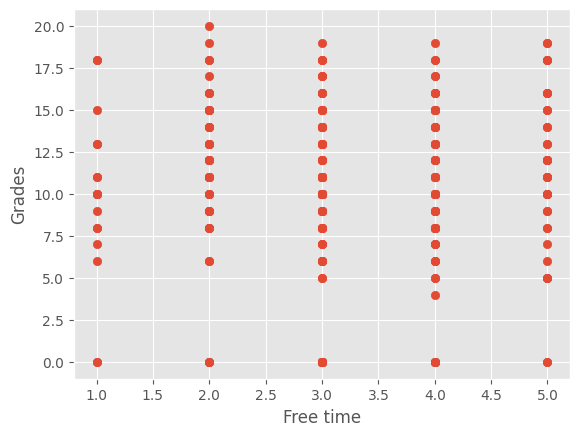

In [68]:
plt.scatter(data2['freetime'], data['G3'])
plt.xlabel('Free time')
plt.ylabel('Grades')
plt.grid(True)
plt.show()